In [0]:
# PyTorch Basic
import torch

# Create a Tensor array
x = torch.Tensor([5,3])
y = torch.Tensor([2,1])

print(x*y) # numpy operation

'''
'''

x = torch.zeros([2,5]) # zero matrix of 2 rows, 5 cols (2 arrays of length 5)
y = torch.rand([2,5]) # random matrix of 2 rows, 5 cols

print(x.shape) # see dim
print(y)

'''
'''

print(y.view([1,10])) # reshape dim !(in-place)
print(y)

tensor([10.,  3.])
torch.Size([2, 5])
tensor([[0.2541, 0.4421, 0.6964, 0.1062, 0.8675],
        [0.2970, 0.4033, 0.3287, 0.1493, 0.1993]])
tensor([[0.2541, 0.4421, 0.6964, 0.1062, 0.8675, 0.2970, 0.4033, 0.3287, 0.1493,
         0.1993]])
tensor([[0.2541, 0.4421, 0.6964, 0.1062, 0.8675],
        [0.2970, 0.4033, 0.3287, 0.1493, 0.1993]])


In [0]:
######################### Set up datasets ########################

In [0]:
import torch
import torchvision
from torchvision import transforms, datasets

# Retrieve training and testing data, download and transform into Tensor 
# param(file loc, train, download, transform)
train = datasets.MNIST("", train=True, download=True,
                      transform = transforms.Compose([transforms.ToTensor()]))

test = datasets.MNIST("", train=False, download=True,
                      transform = transforms.Compose([transforms.ToTensor()]))


# Load data as Torch object, helps iterate thru data

# batch_size = gradient descent (optimization algorithm), controls the number of
# training samples to work through before the model’s internal parameters are updated
# shuffle = allows for better generalization principle

# Within the dataset, feed 10 items at a time to the model, the model optimizes at each succession
trainset = torch.utils.data.DataLoader(train, batch_size=10, shuffle=True)
testset = torch.utils.data.DataLoader(test, batch_size=10, shuffle=True)

In [0]:
# View a single data in matrix form
for data in trainset:
    print(data)
    break
    
x, y = data[0][0], data[1][0] # access data matrix

# ASSUMPTION: 
# x: compositions of images' pixels
# y: values predicted, result of graphing x

print(y)

[tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0

torch.Size([1, 28, 28])


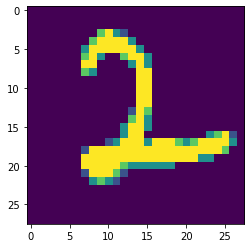

In [0]:
# Plot a single data
import matplotlib.pyplot as plt

print(data[0][0].shape)
plt.imshow(data[0][0].view(28, 28))
plt.show() 

In [0]:
# When inputing data into the neural network, be mindful of batch size, shuffle,
# balance

# Balance: When there are even distribution of values
# In a dataset where 60% of the values are 3's, and 40% are #1-9, it is not balanced.
# To alleviate imbalanced dataset, modify weights of specific classes when calculating
# loss.

# Confirm a dataset is balanced
total = 0
counter_dict = {0:0, 1:0, 2:0, 3:0, 4:0, 5:0, 6:0, 7:0, 8:0, 9:0}

for data in trainset:
    Xs, ys = data
    for y in ys:
        counter_dict[int(y)] += 1
        total += 1
        
print(counter_dict)

for i in counter_dict:
    print(f"{i}: {counter_dict[i]/total*100:.2f}")
    
# Since all values have very similar %, safe to assume it's balanced.

{0: 5923, 1: 6742, 2: 5958, 3: 6131, 4: 5842, 5: 5421, 6: 5918, 7: 6265, 8: 5851, 9: 5949}
0: 9.87
1: 11.24
2: 9.93
3: 10.22
4: 9.74
5: 9.04
6: 9.86
7: 10.44
8: 9.75
9: 9.92


In [0]:
######################### Build Neural Network ########################

In [0]:
import torch.nn as nn # OOP in PyTorch
import torch.nn.functional as F # Functions in PyTorch

class Net(nn.Module):
    def __init__(self):
        super().__init__() # run init from parent class (nn.Module)
        
        # Define (3) fully-connected layers to nn
        # self.fc1 = nn.Linear(input, output)
        self.fc1 = nn.Linear(784, 64) # input: 784 from flatten 28x28 images
                                      # output: 64 neurons in this hidden layers
        self.fc2 = nn.Linear(64, 64) # input: 64 from fc1 output
                                     # output: 64 neurons in this hidden layers
        self.fc3 = nn.Linear(64, 64) # input: 64 from fc2 output
                                     # output: 64 neurons in this hidden layers
        self.fc4 = nn.Linear(64, 10) # input: 64 from fc3 output
                                     # output: 10 classes from the MNIST #0-9
    
    def forward(self, x):
        # F.relu = activation fxn (rectified linear unit)
        x = F.relu(self.fc1(x)) # activate the entire layer 1 
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
        
        return F.log_softmax(x, dim=1) 
            
net = Net()
print(net)

Net(
  (fc1): Linear(in_features=784, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=10, bias=True)
)


In [0]:
# Test nn
X = torch.rand((28,28))
X = X.view(-1, 28*28) # -1 = data of any size
output = net(X)
print(output)

tensor([[-2.3287, -2.3579, -2.3603, -2.2117, -2.3223, -2.3536, -2.2444, -2.2307,
         -2.3177, -2.3124]], grad_fn=<LogSoftmaxBackward>)


In [0]:
######################### Training models ########################

In [0]:
# Loss (MSE): margin of error (try to minimize this value / increase confident interval)
# - if predictions deviates a lot from actual results, loss fxn will return a large number

import torch.optim as optim

# par1: adjustable variables in the model
# par2: learning rate (also 1e-03, get by trial&error) --> gradient descent hops
optimizer = optim.Adam(net.parameters(), lr=0.001) 

# Epoch: full iteration through the entire data
EPOCHS = 3

for epoch in range(EPOCHS):
    for data in trainset:
        # Data is a "Batch" of featuresets and labels
        X, y = data
        
        # print(X[0]) # rows of pixels making up an image (needs to be flatten)
        # print(y[0]) # result of graphing X[0]
        
        net.zero_grad() # before passing data to NN, set up (reset) zero gradient 
        output = net(X.view(-1, 28*28)) # -1 replacable with any other batch size
        
        # If dataset is a scalar, use nll_loss; elif is a one-hot vector, use MSE
        # One-hot encoding: description of an input
        # Allows computer to understand input + human understand to output
        # Length of each OHVector = # of categories (i.e. classifying dogs and cats yields [x, x])
        loss = F.nll_loss(output, y) 
        loss.backward()
        optimizer.step() # auto adjust weights
    print(loss)

tensor(0.0123, grad_fn=<NllLossBackward>)
tensor(0.0134, grad_fn=<NllLossBackward>)
tensor(0.0181, grad_fn=<NllLossBackward>)


In [0]:
# Check for the goodness of the network (*note: high accuracy != best)
# It's less likely to achieve high acc. on real data
correct = 0
total = 0

with torch.no_grad():
    for data in trainset:
        X, y = data
        output = net(X.view(-1, 784))
        for idx, i in enumerate(output):
            if torch.argmax(i) == y[idx]:
                correct += 1
            total += 1
print("Accuracy: ", round(correct/total, 3))

Accuracy:  0.977


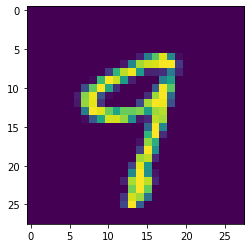

tensor(9)


In [0]:
import matplotlib.pyplot as plt
tVal = X[9]
plt.imshow(tVal.view(28, 28))
plt.show()
print(torch.argmax(net(tVal.view(-1, 784))[0])) # verify

In [0]:
######################### Convolutional NN ########################

In [43]:
import os
import cv2
import numpy as np
from tqdm import tqdm

REBUILD_DATA = False

if torch.cuda.is_available(): # check for GPU (Google Colab)
    device = torch.device("cuda:0") # choose GPU if more than one
    print("Running on the GPU")
else:
    device = torch.device("cpu")
    print("Running on the CPU")

class DogsVSCats():
    IMG_SIZE = 50 # make uniform images of 50x50
    CATS = "PetImages/Cat"
    DOGS = "PetImages/Dog"
    LABELS = {CATS: 0, DOGS: 1}
    training_data = []
    catcount = 0
    dogcount = 0
    
    def make_training_data(self):
        for label in self.LABELS:
            print(label)
            for f in tqdm(os.listdir(label)): # for each img_file in the folder
                try:
                    path = os.path.join(label, f)
                    img = cv2.imread(path, cv2.IMREAD_GRAYSCALE) # turn grayscale
                    img = cv2.resize(img, (self.IMG_SIZE, self.IMG_SIZE)) # resize
                    
                    # Associate each image with a label
                    # np.eye(x) creates an identity matrix of size x, ([1,0], [0,1]) 
                    self.training_data.append([np.array(img), np.eye(2)[self.LABELS[label]]])

                    if label == self.CATS:
                        self.catcount += 1
                    elif label == self.DOGS:
                        self.dogcount += 1
                except Exception as e:
                    # print(str(e))
                    pass
        np.random.shuffle(self.training_data)
        np.save("training_data.npy", self.training_data)
        
        print("Cats: ", self.catcount)
        print("Dogs: ", self.dogcount)
        
if REBUILD_DATA:
    dogsvcats = DogsVSCats()
    dogsvcats.make_training_data()
    
training_data = np.load("training_data.npy", allow_pickle=True)

Running on the GPU


In [0]:
print(training_data[1])

[array([[153, 154, 150, ..., 163, 141, 161],
       [149, 148, 155, ..., 155, 161, 124],
       [153, 151, 150, ..., 154, 152, 156],
       ...,
       [139, 158, 130, ..., 115, 112, 110],
       [148, 121, 106, ..., 100, 109, 100],
       [135, 126, 125, ..., 129, 126, 131]], dtype=uint8)
 array([0., 1.])]


In [0]:
import matplotlib.pyplot as plt

plt.imshow(training_data[1][0], cmap="gray")
plt.show()

In [0]:
######################### Training Covnet ########################

In [0]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super().__init__()
        
        # Create 2-D conv layers
        self.conv1 = nn.Conv2d(1, 32, 5) # (input, output, kernel size)
        self.conv2 = nn.Conv2d(32, 64, 5)
        self.conv3 = nn.Conv2d(64, 128, 5)

        # Flatten images into linear fc
        x = torch.randn(50, 50).view(-1, 1, 50, 50)
        self._to_linear = None
        self.convs(x)
        
        # Create fully-connected layers
        self.fc1 = nn.Linear(self._to_linear, 512)
        self.fc2 = nn.Linear(512, 2)

    # Run this fxn with random data (x) to retrieve an input (to-linear),
    # input is needed for the first fc layer
    def convs(self, x): # similar to forward()
        x = F.max_pool2d(F.relu(self.conv1(x)), (2,2))
        x = F.max_pool2d(F.relu(self.conv2(x)), (2,2))
        x = F.max_pool2d(F.relu(self.conv3(x)), (2,2))

        if self._to_linear is None:
            self._to_linear = x[0].shape[0]*x[0].shape[1]*x[0].shape[2]
            
        return x
    
    def forward(self, x):
        x = self.convs(x) # pass through conv layers
        x = x.view(-1, self._to_linear) # flatten
        x = F.relu(self.fc1(x)) # pass through 1st fully-connected layer
        x = self.fc2(x) # bc this is the output layer, no activation
        
        return F.softmax(x, dim=1) # activation fxn
    
net = Net().to(device) # moves the entire NN to the GPU

In [0]:
import torch.optim as optim

X = torch.Tensor([i[0] for i in training_data]).view(-1, 50, 50)
X = X/255.0 # scale img pixel values to 0 and 1, original was 0-255 bc of colors
y = torch.Tensor([i[1] for i in training_data])

VAL_PCT = 0.1 # target to test 10% of our dataset
val_size = int(len(X)*VAL_PCT)

train_X = X[:-val_size]
train_y = y[:-val_size]

test_X = X[-val_size:]
test_y = y[-val_size:]

In [0]:
# Begin training
BATCH_SIZE = 100 # lower value if encounter memory error
EPOCHS = 10

def train(net):    
    optimizer = optim.Adam(net.parameters(), lr=0.001)
    loss_function = nn.MSELoss()

    for epoch in range(EPOCHS):
        # tqdm is a progress bar
        for i in tqdm(range(0, len(train_X), BATCH_SIZE)): # range(start, end, step)
            # print(i, i + BATCH_SIZE) # see each batch at their index in the dataset
            batch_X = train_X[i:i+BATCH_SIZE].view(-1, 1, 50, 50)
            batch_y = train_y[i:i+BATCH_SIZE]
            
            batch_X, batch_y = batch_X.to(device), batch_y.to(device)

            # Before fitment and optimization, need to zero the gradient
            net.zero_grad()
            outputs = net(batch_X)
            loss = loss_function(outputs, batch_y) # calc loss based on output
            loss.backward()
            optimizer.step() # update
        print(f"Epoch: {epoch}. Loss: {loss}")

def test(net):
    correct = 0
    total = 0
    with torch.no_grad():
        for i in tqdm(range(len(test_X))):
            real_class = torch.argmax(test_y[i]).to(device)
            net_out = net(test_X[i].view(-1,1,50,50).to(device))[0]
            predicted_class = torch.argmax(net_out)
            if predicted_class == real_class:
                correct += 1
            total += 1
    print("Accuracy:", round(correct/total, 3))


In [51]:
train(net)
test(net)

  5%|▍         | 11/225 [00:00<00:01, 107.63it/s]

Epoch: 0. Loss: 0.15110130608081818


  5%|▍         | 11/225 [00:00<00:01, 108.27it/s]

Epoch: 1. Loss: 0.1355632245540619


  5%|▌         | 12/225 [00:00<00:01, 110.51it/s]

Epoch: 2. Loss: 0.12759986519813538


  5%|▍         | 11/225 [00:00<00:01, 109.58it/s]

Epoch: 3. Loss: 0.12288336455821991


  5%|▍         | 11/225 [00:00<00:02, 101.91it/s]

Epoch: 4. Loss: 0.11427795886993408


  5%|▍         | 11/225 [00:00<00:02, 104.91it/s]

Epoch: 5. Loss: 0.10694730281829834


  5%|▍         | 11/225 [00:00<00:01, 107.73it/s]

Epoch: 6. Loss: 0.10645871609449387


  5%|▍         | 11/225 [00:00<00:01, 108.67it/s]

Epoch: 7. Loss: 0.10315454006195068


  5%|▍         | 11/225 [00:00<00:01, 107.72it/s]

Epoch: 8. Loss: 0.09003334492444992


  7%|▋         | 167/2494 [00:00<00:01, 1663.50it/s]

Epoch: 9. Loss: 0.0911555290222168


100%|██████████| 2494/2494 [00:01<00:00, 1623.68it/s]

Accuracy: 0.746


In [0]:
######################### Model Analysis ########################

In [0]:
def fwd_pass(X, y, train=False):
    if train:
        net.zero_grad()
    outputs = net(X)
    matches = [torch.argmax(i) == torch.argmax(j) for i, j in zip(outputs, y)]
    acc = matches.count(True)/len(matches)
    loss = loss_function(outputs, y)

    if train:
        loss.backward()
        optimizer.step()

    return acc, loss

In [57]:
def test(size=32):
    random_start = np.random.randint(len(test_X)-size)
    X, y = test_X[random_start:random_start+size], test_y[random_start:random_start+size]
    with torch.no_grad():
        val_acc, val_loss = fwd_pass(X.view(-1,1,50,50).to(device), y.to(device))

    return val_acc, val_loss

val_acc, val_loss = test(size=32)
print(val_acc, val_loss)

0.71875 tensor(0.1912, device='cuda:0')


In [65]:
import time

MODEL_NAME = f"model - {int(time.time())}"

net = Net().to(device)
optimizer = optim.Adam(net.parameters(), lr=0.001)
loss_function = nn.MSELoss()

print(MODEL_NAME)

def train():
    BATCH_SIZE = 100
    EPOCHS = 30

    with open("model_30_epochs.log", "a") as f:
        for epoch in range(EPOCHS):
            for i in tqdm(range(0, len(train_X), BATCH_SIZE)):
                batch_X = train_X[i:i+BATCH_SIZE].view(-1,1,50,50).to(device)
                batch_y = train_y[i:i+BATCH_SIZE].to(device)

                acc, loss = fwd_pass(batch_X, batch_y, train=True)
                if i % 50 == 0:
                    val_acc, val_loss = test(size=100)
                    f.write(f"{MODEL_NAME},{round(time.time(),3)},{round(float(acc),2)},{round(float(loss), 4)},{round(float(val_acc),2)},{round(float(val_loss),4)}\n")

train()

  2%|▏         | 4/225 [00:00<00:06, 36.43it/s]

model - 1577688250


100%|██████████| 225/225 [00:05<00:00, 38.61it/s]
